Drug Use by Age

Robert Alterman
SI 370 - Data Exploration
Final Project

In [301]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
from bokeh.charts import Scatter
from bokeh.models import ColumnDataSource
from bokeh.charts import Bar
from bokeh.charts import Histogram
from bokeh.charts import BoxPlot
from bokeh.layouts import gridplot

Loading BokehJS ...

In [302]:
import numpy as np
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_context("paper")  # make figures fit
from pylab import rcParams
plt.rcParams['figure.figsize'] = 7, 4
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.mixture as skmix
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)
from IPython.core.display import HTML

In [293]:
drugs = pd.read_csv("drug-use-by-age.csv")
drugs = drugs.replace('-','0.0')
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [294]:
stats = drugs[drugs.columns[2:]]
stats.describe()

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,inhalant-use,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,1.388235,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,0.927283,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,0.000000,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,0.600000,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,1.400000,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,2.000000,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,3.000000,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


Alcohol is by far the most used drug in the study, on average, while marijuana is used most frequently.

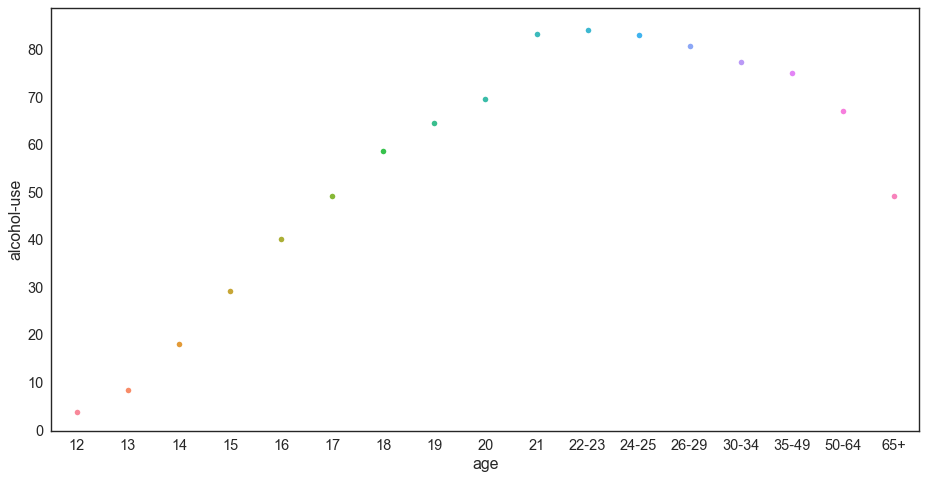

In [295]:
fig=plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')
sns.stripplot(data=drugs,x='age',y='alcohol-use')

The peak age of alcohol usage appears to be between 21 and 22... shocker! There seems to be a direct relationship between age and alcohol use, with usage increasing until a certain age and then gradually decreasing.

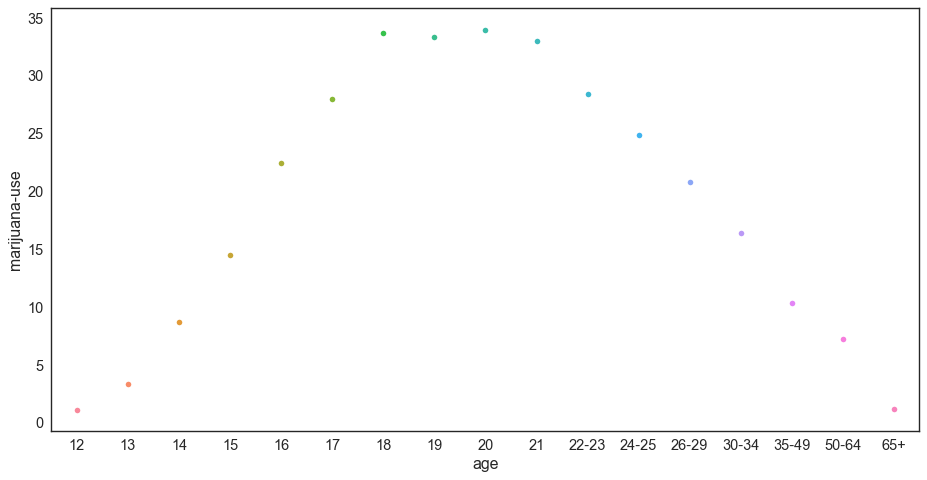

In [296]:
fig=plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')
sns.stripplot(data=drugs,x='age',y='marijuana-use')

The peak age of marijuana usage appears to be between 18 and 21. There seems to be a direct relationship between age and marijuana use up to age 21, and then an indirect relationship between the two onward.

Are those who drink more alcohol more likely to smoke marijuana?

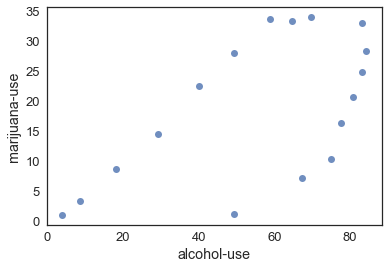

In [297]:
sns.regplot(data=drugs,x='alcohol-use',y='marijuana-use', fit_reg=False)

In [298]:
p = Scatter(drugs, x='alcohol-use', y='marijuana-use', 
            color='age', legend='top_left',
            plot_width=700, plot_height=700)
show(p)

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='074b1298-8a87-43b6-a547-3166aeff8621', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='0d5e0859-3f44-43c5-8c7d-53cc767b02ed', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='26d730db-11db-47d8-adc7-7b36ff672a3a', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='69efda03-8c5c-4d47-a8d5-0076622d4805', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='72b13c6e-d4b6-46c5-8f64-741194173e3b', ...)
E-1010 (CDSVIEW

Checking for correlation between alcohol use and marijuana use. Doesn't appear to be conclusive but seems that there is a strong, positive, linear correlation between the two variables up to age 21, and then a strong, negative, linear correlation between the two variables from age 21 onward.

In [299]:
under21 = drugs.loc[:9]
over21 = drugs.loc[10:]

In [303]:
r,p = stats.pearsonr(under21['alcohol-use'],under21['marijuana-use'])
print ("Pearson's r:",r,p)
tau, p_value = stats.kendalltau(under21['alcohol-use'],under21['marijuana-use'])
print("Kendall's tau:",tau,p_value)
correlation,pvalue = stats.spearmanr(under21['alcohol-use'],under21['marijuana-use'])
print("Spearman's rho:",correlation,pvalue)

Pearson's r: 0.965123152774 6.20631260323e-06
Kendall's tau: 0.822222222222 0.00093502635264
Spearman's rho: 0.915151515152 0.000204472406149


Since Pearson's r coefficient is the highest, a linear relationship between the variables is suggested for under 21.

In [304]:
r,p = stats.pearsonr(over21['alcohol-use'],over21['marijuana-use'])
print ("Pearson's r:",r,p)
tau, p_value = stats.kendalltau(over21['alcohol-use'],over21['marijuana-use'])
print("Kendall's tau:",tau,p_value)
correlation,pvalue = stats.spearmanr(over21['alcohol-use'],over21['marijuana-use'])
print("Spearman's rho:",correlation,pvalue)

Pearson's r: 0.911580644797 0.00425534047298
Kendall's tau: 1.0 0.00161079496389
Spearman's rho: 1.0 0.0


Since spearman's rho is 1, the variables have a monotonic relationship for over 21. Kendall's tau is 1 also, suggesting the variables have identical rank.

In [305]:
slope, intercept, r, p, serr = stats.linregress(under21['alcohol-use'],
                                                under21['marijuana-use'])
print("slope=",slope)
print("intercept=",intercept)
print("r value=",r)
print("p value=",p)
print("standard error",serr)

slope= 0.471307455321
intercept= 1.18529392519
r value= 0.965123152774
p value= 6.20631260323e-06
standard error 0.0452001709807


In [306]:
slope, intercept, r, p, serr = stats.linregress(over21['alcohol-use'],
                                                over21['marijuana-use'])
print("slope=",slope)
print("intercept=",intercept)
print("r value=",r)
print("p value=",p)
print("standard error",serr)

slope= 0.732129722395
intercept= -38.4444380683
r value= 0.911580644797
p value= 0.00425534047298
standard error 0.147665120717


Since our p-value is very small for both under and over 21, we have statistically significant evidence to conclude that there is a relationship between alcohol use and marijuana use with age.

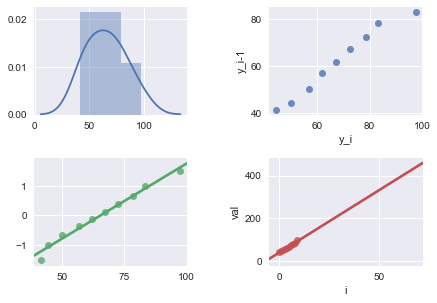

In [307]:
expected = (slope * under21['marijuana-use'] + intercept)
residuals = under21['alcohol-use'] - expected
fourPlot(residuals)

Data is skewed slightly to the right for under 21.

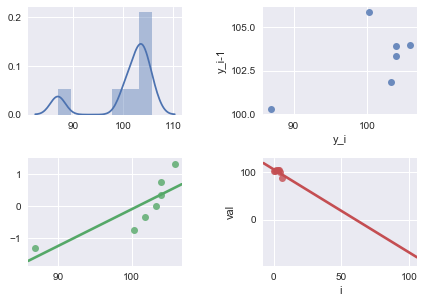

In [308]:
expected = (slope * over21['marijuana-use'] + intercept)
residuals = over21['alcohol-use'] - expected
fourPlot(residuals)

Data is skewed to the left.

In [309]:
(drugs[drugs.columns[2:]]).corr()

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,inhalant-use,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
alcohol-use,1.000000,0.897889,0.594165,0.920425,0.773458,0.877378,0.677614,0.463702,-0.346643,-0.648248,0.617523,-0.263721,0.589219,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.318268,0.091251
alcohol-frequency,0.897889,1.000000,0.260219,0.818769,0.577601,0.785050,0.546194,0.182184,-0.174622,-0.864153,0.280704,0.007087,0.251554,0.448543,-0.415026,0.291766,0.260304,0.425153,0.029867,0.201423
marijuana-use,0.594165,0.260219,1.000000,0.615610,0.883789,0.620670,0.711613,0.959353,-0.478286,0.127336,0.966226,-0.506892,0.971733,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.616766,-0.277144
marijuana-frequency,0.920425,0.818769,0.615610,1.000000,0.742598,0.892077,0.631789,0.528733,-0.380430,-0.577792,0.612254,-0.285292,0.609618,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.399124,0.048777
cocaine-use,0.773458,0.577601,0.883789,0.742598,1.000000,0.835727,0.899944,0.855668,-0.368402,-0.214609,0.906638,-0.273908,0.865626,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.461914,-0.159997
crack-use,0.877378,0.785050,0.620670,0.892077,0.835727,1.000000,0.750790,0.556222,-0.198968,-0.543499,0.652764,-0.203711,0.603003,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.438421,0.091676
heroin-use,0.677614,0.546194,0.711613,0.631789,0.899944,0.750790,1.000000,0.683674,-0.302988,-0.215961,0.805868,-0.135961,0.775321,0.818583,-0.175464,0.808024,-0.277996,0.816620,0.333649,-0.023708
hallucinogen-use,0.463702,0.182184,0.959353,0.528733,0.855668,0.556222,0.683674,1.000000,-0.427863,0.173030,0.909333,-0.419961,0.916777,0.862900,-0.314281,0.940008,-0.319860,0.780071,0.518700,-0.312746
hallucinogen-frequency,-0.346643,-0.174622,-0.478286,-0.380430,-0.368402,-0.198968,-0.302988,-0.427863,1.000000,-0.137576,-0.488187,0.547363,-0.442181,-0.458016,0.705734,-0.452345,-0.103980,-0.432520,-0.231773,0.533095
inhalant-use,-0.648248,-0.864153,0.127336,-0.577792,-0.214609,-0.543499,-0.215961,0.173030,-0.137576,1.000000,0.092045,-0.342676,0.110492,-0.103745,0.158140,0.108381,-0.419717,-0.059903,0.110611,-0.293189


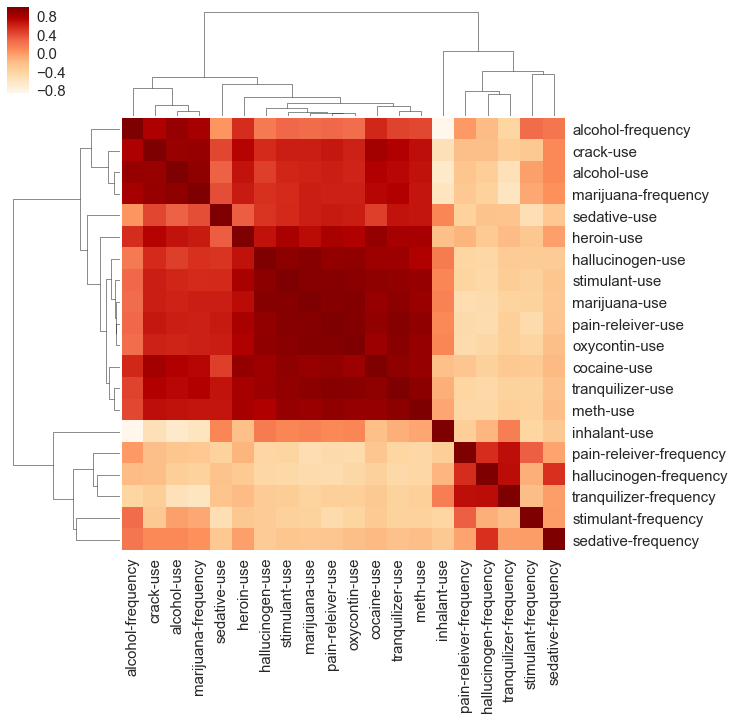

In [310]:
sns.clustermap((drugs[drugs.columns[2:]]).corr(),cmap=plt.cm.OrRd)

Looking at all of the correlations between the drugs and the corresponding cluster map, it appears that there are significant correlations between nearly all of the drugs, suggesting that drug users tend to use multiple different drugs.

Does age play a role in the use of certain drugs? Are certain drugs more popular for different age groups?


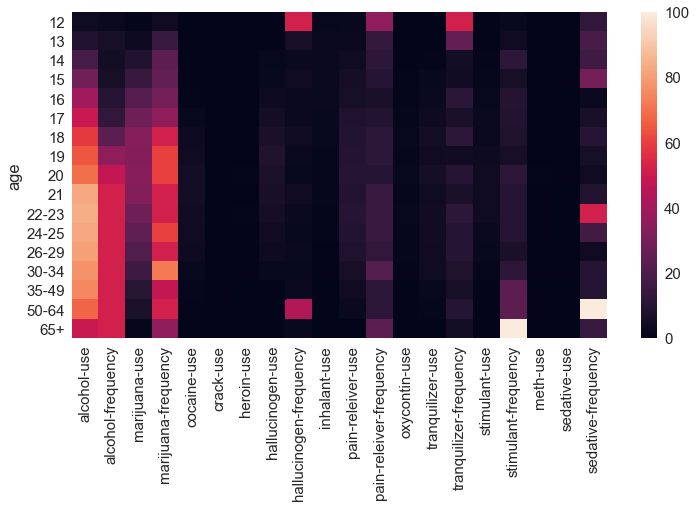

In [311]:
drugs_byage = drugs.groupby('age').mean()
drugs_byage = drugs_byage[drugs_byage.columns[1:]]
# drugs_byage
f,ax = plt.subplots(figsize=(12,6))
sns.heatmap(drugs_byage, ax=ax, vmin=0, vmax=100)

From the heatmap above, we see that alcohol and marijuana are used significantly across many ages. There also appears to be some possible outliers such 12 year old use of hallucinogens and the frequencies of stimulants and sedatives for the older age groups.

In [312]:
drugs_dist = spd.squareform(spd.pdist(drugs[drugs.columns[2:]],metric='euclidean'))
drugs_dist.shape

(17, 17)

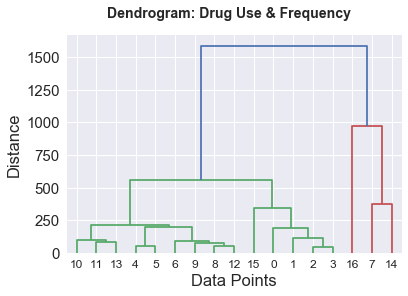

In [313]:
Z_xy = sph.linkage(drugs_dist,method='ward')
_ = sph.dendrogram(Z_xy)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.suptitle('Dendrogram: Drug Use & Frequency', 
             fontweight='bold', fontsize=14);

As we can see from the dendrogram above, there appears to be 2 distinct clusters. I used the Ward method since it provided the best visualization of different clusters.

In [314]:
def plotSilhouette(X,range_n_clusters=[2, 3, 4, 5, 6]):
    X = X.as_matrix()

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()


For n_clusters = 2 The average silhouette_score is : 0.640028700266


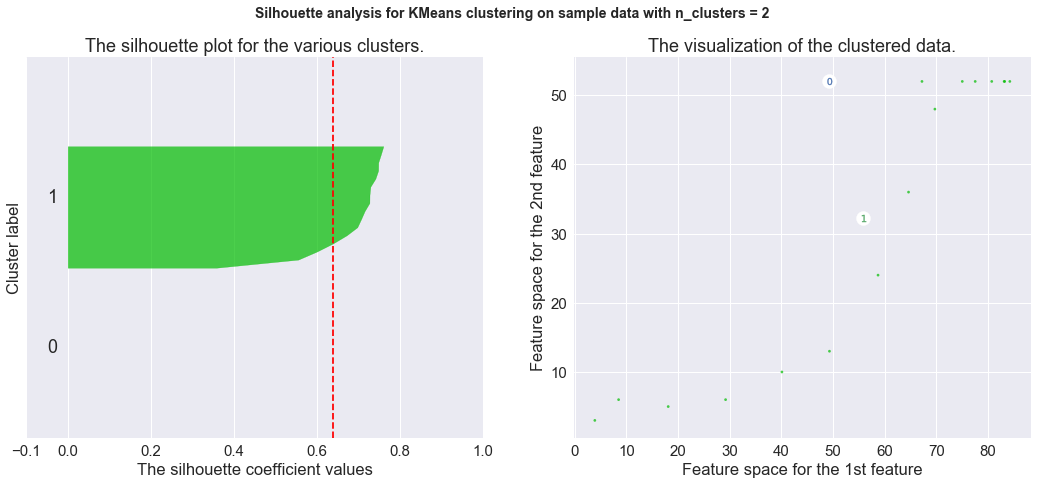

For n_clusters = 3 The average silhouette_score is : 0.532238540485


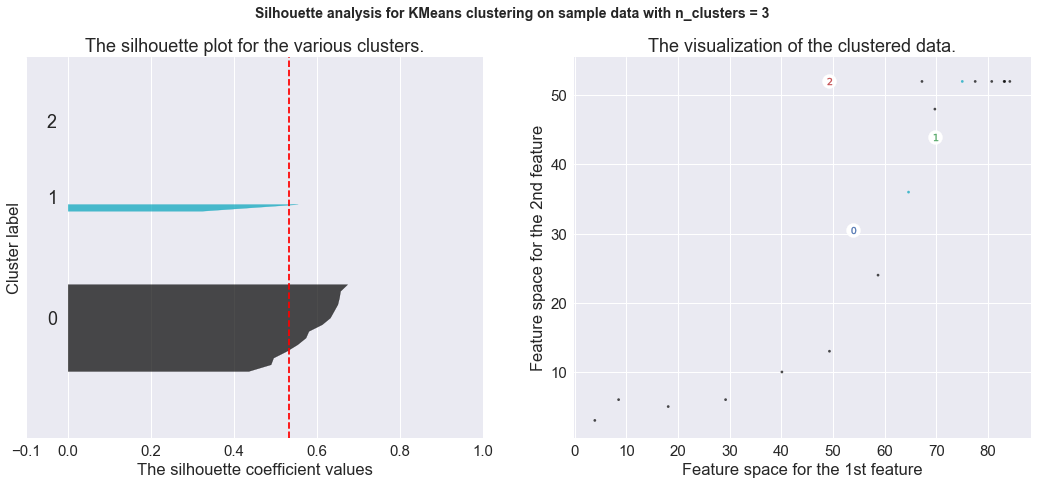

For n_clusters = 4 The average silhouette_score is : 0.353943355845


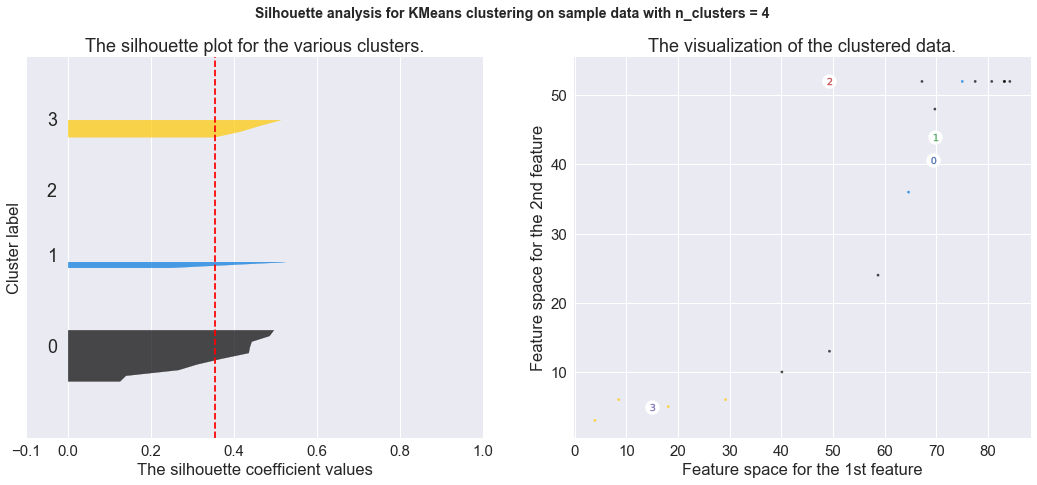

For n_clusters = 5 The average silhouette_score is : 0.370272312358


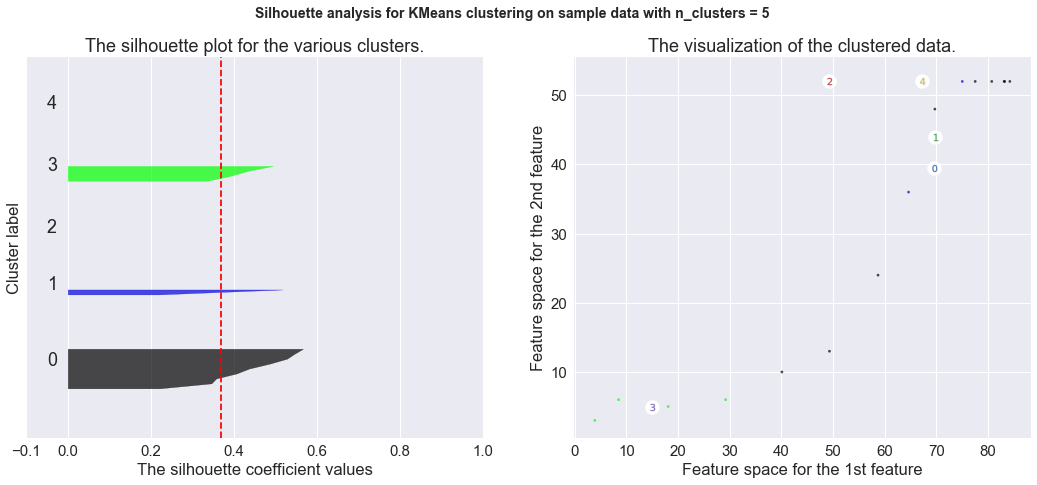

For n_clusters = 6 The average silhouette_score is : 0.326631144779


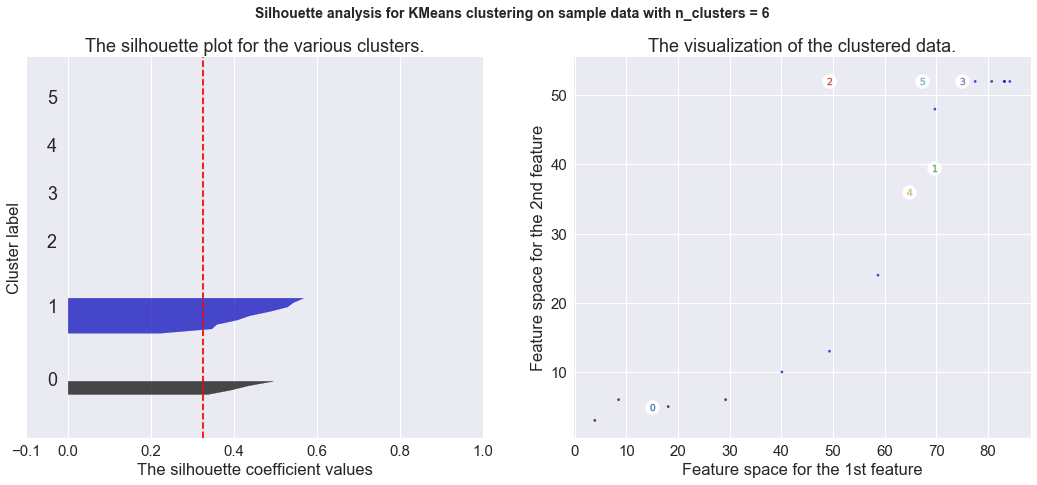

In [315]:
X = (drugs.replace('-','0.0')).copy()
X = X[X.columns[2:]]
plotSilhouette(X)

In [316]:
K = range(2,11)  # Apply kmeans 2 to 10

# run k-means for each k
KM = [skc.KMeans(n_clusters=k).fit(X) for k in K]

# Note that silhouette_score is unhappy with k=1
# calculate the silhouette for each model
silh_scores = [skm.silhouette_score(X,km.labels_) for km in KM]

# find the best score
kIdx = np.argmax(silh_scores)

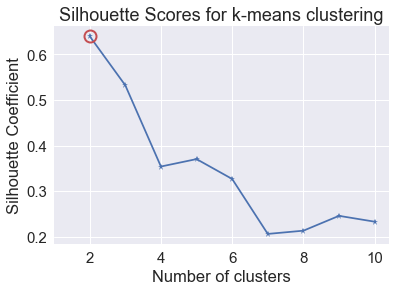

In [317]:
plt.plot(K, silh_scores, 'b*-')
plt.plot(K[kIdx], silh_scores[kIdx], marker='o', markersize=12, 
         markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.xlim(1, plt.xlim()[1])
plt.xlabel('Number of clusters');
plt.ylabel('Silhouette Coefficient');
plt.title('Silhouette Scores for k-means clustering');

From the silhouette plot and the chart above, we see that 2 is the optimal number of clusters for this data set, as its average silhouette score is the highest.

Do younger age groups have a higher frequency of stimulant usage due to ADHD and “study” drugs?

In [318]:
p = Bar(drugs, label='age', values='stimulant-frequency', agg='mean', 
        title="Mean Stimulant Frequency by Age", legend=None, tools='crosshair',
        plot_width=500, plot_height=400)
show(p)

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='010f441b-8c5c-4206-8769-d8ae2ef80fd8', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='192a3e58-1395-49c5-af65-0f35055859ce', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='1af665a9-7739-4a4f-bd89-4f695b1e7a80', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='1b949ec7-c96b-4a81-87df-5d288827775f', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='1ff185e2-d5fd-4858-908a-6fe15509d90c', ...)
E-1010 (CDSVIEW

From the bar chart above, we see that the frequency of stimulant usage is drastically higher for those ages 65 and over, but relatively high for high school and college students as well.